In [1]:
import yfinance as yf
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [10]:
def download_yfinance_data(tickers, start_date, end_date):
    """
    Download historical stock data from Yahoo Finance for the given tickers and date range.
    Combine all data into a single DataFrame with a fixed daily index.
    """
    date_dataframe = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='D'), columns=['Date'])

    for ticker in tqdm(tickers):
        try:
            data_ticker = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)
            if not data_ticker.empty:
                # Determine which column to use
                close_column = 'Adj Close' if 'Adj Close' in data_ticker.columns else 'Close'
                data_extract = data_ticker[[close_column]].rename(columns={close_column: ticker})
                date_dataframe = date_dataframe.merge(data_extract, left_on='Date', right_index=True, how='left')
        except Exception as e:
            print(f"Error for {ticker}: {e}")

    return date_dataframe

In [11]:
def get_all_tickers():
    # API URL
    url = "https://api.nasdaq.com/api/screener/stocks?tableonly=true&download=true"
    # Headers (User-Agent is required to avoid access restrictions)
    headers = {"User-Agent": "Mozilla/5.0"}

    # Fetch data from the API
    response = requests.get(url, headers=headers)
    data = response.json()

    # Extract relevant rows
    rows = data.get("data", {}).get("rows", [])

    # Create DataFrame
    df_result = pd.DataFrame(rows, columns=["symbol", "name", "country", "ipoyear", "industry"])

    # Display the first few rows
    return df_result

In [12]:
# df = pd.read_csv("yfinance_data.csv")

In [13]:
# df_all_tickers = get_all_tickers() #6898

In [14]:
# start_date = "2024-01-01"
# end_date = "2024-12-31"
# tickers = df_all_tickers['symbol'].to_list()  # Example tickers
# # tickers = ['AAPL','MSFT','GOOGL']
#
# df = download_yfinance_data(tickers, start_date, end_date)
#
# if df is not None:
#     df.to_csv("yfinance_data.csv")
#     print("Data successfully downloaded and saved to yfinance_data.csv")

In [15]:
# df = df.set_index('Date')
# df_clean = df.dropna(axis=1, thresh=int(len(df.index)/2), inplace=False)
# # df_filled = df_clean.interpolate(method='linear')
# # c = df_filled.corr().abs()
# c = df_clean.corr().abs()
# # Remove self-correlation and keep only one side of the matrix
# c = c.where(~np.tril(np.ones(c.shape), k=0).astype(bool))
# s = c.unstack()
# so = s.sort_values(kind="quicksort", ascending=False).reset_index()
# so.columns = ['ticker_1', 'ticker_2', 'correlation']
# so.to_csv('ticker_correlations.zip')

In [16]:
# so[so['correlation']<1]


In [17]:

wiki_data=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies') # Open the link and download S&P company details in a table
data = wiki_data[0] # All data is stored in first cell
sorted_data = data.sort_values(by=['Symbol'], ascending=True) # Sort the dataframe on ticker in alphabetical ascending order
# Convert the dataframe to csv file
sorted_data.to_csv('S&P500Tickers.csv', mode='w', index=False) #index is False as we don't want to write index in csv file
sorted_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
39,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
11,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969


In [18]:
# Analysis on snp500 only
start_date = "2020-01-01"
end_date = "2025-01-31"
tickers = sorted_data['Symbol'].to_list()  # Example tickers

df = download_yfinance_data(tickers, start_date, end_date)

if df is not None:
    df.to_csv("yfinance_snp500_data_202001_202501.csv")
    print("Data successfully downloaded and saved to yfinance_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Data successfully downloaded and saved to yfinance_data.csv


In [19]:
# df = df.set_index('Date')
df_clean = df.dropna(axis=1, thresh=int(len(df.index)/2), inplace=False)
# df_filled = df_clean.interpolate(method='linear')
# c = df_filled.corr().abs()
c = df_clean.corr().abs()
# Remove self-correlation and keep only one side of the matrix
c = c.where(~np.tril(np.ones(c.shape), k=0).astype(bool))
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).reset_index()
so.columns = ['ticker_1', 'ticker_2', 'correlation']
so.to_csv('snp500_correlations_202001_202501.zip')

In [6]:
# read csv files
# df = pd.read_csv("yfinance_snp500_data_202001_202501.csv")
# so = pd.read_csv('snp500_correlations_202001_202501.zip')

In [20]:
so[so['correlation']<1]

,ticker_1,ticker_2,correlation
0,GOOGL,GOOG,0.999768
1,LEN,DHI,0.994664
2,VMC,MLM,0.991180
3,SNPS,CDNS,0.990591
4,FOXA,FOX,0.990033
...,...,...,...
121766,INVH,ES,0.000039
121767,GPC,C,0.000026
121768,LW,EXR,0.000023
121769,PFE,HES,0.000022


In [21]:
## check for cointegration
def check_stationarity(series):
    """Returns the p-value from the Augmented Dickey-Fuller (ADF) test."""
    return adfuller(series)[1]  # ADF test p-value

def calculate_cointegration(corr_df, timeseries_df):
    """
    Takes in:
    - corr_df: DataFrame with columns ['ticker1', 'ticker2', 'correl']
    - timeseries_df: DataFrame where each column is a ticker's time series.

    Adds three new columns:
    - 'p1_stationary': ADF p-value for ticker1
    - 'p2_stationary': ADF p-value for ticker2
    - 'p_cointegration': Cointegration test p-value
    """

    results = []  # Store results for efficient DataFrame construction

    for index, row in corr_df.iterrows():
        t1, t2 = row["ticker_1"], row["ticker_2"]

        # Get time series data
        series1 = timeseries_df[t1].dropna()
        series2 = timeseries_df[t2].dropna()

        # Ensure both series have the same length
        min_len = min(len(series1), len(series2))
        series1, series2 = series1.iloc[-min_len:], series2.iloc[-min_len:]

        # Check stationarity (ADF test)
        p1 = check_stationarity(series1)
        p2 = check_stationarity(series2)

        # Check cointegration only if both series are non-stationary (p > 0.05)
        if p1 > 0.05 and p2 > 0.05:
            p_cointegration1 = coint(series1, series2, trend='c')[1]  # Engle-Granger test p-value
            p_cointegration2 = coint(series2, series1, trend='c')[1]
        else:
            p_cointegration1 = np.nan  # Not applicable
            p_cointegration2 = np.nan

        results.append((t1, t2, p1, p2, p_cointegration1, p_cointegration2))

    # Convert results into DataFrame and merge with original correlation DataFrame
    results_df = pd.DataFrame(results, columns=["ticker_1", "ticker_2", "p1_stationary", "p2_stationary", "p_cointegration1", "p_cointegration2"])
    return corr_df.merge(results_df, on=["ticker_1", "ticker_2"])

corr_df = calculate_cointegration(so, df)
corr_df.to_csv('SnP500cointegration_results_temp2.csv')
corr_df['p_coint_avg'] = corr_df[['p_cointegration1', 'p_cointegration2']].mean(axis=1, skipna=True)
corr_df['p_coint_min'] = corr_df[['p_cointegration1', 'p_cointegration2']].min(axis=1, skipna=True)
corr_df['p_coint_max'] = corr_df[['p_cointegration1', 'p_cointegration2']].max(axis=1, skipna=True)
corr_df.to_csv('SnP500cointegration_results_202001_202501.csv')

C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) 

In [27]:
corr_df[(corr_df['p_coint_max']>0) &
        (corr_df['p_coint_max']<0.01) &
        (corr_df['p1_stationary']>=0.05) &
        (corr_df['p2_stationary']>=0.05) &
        (~corr_df['correlation'].isna())
        ].sort_values(by='p_coint_max', ascending=False)

,ticker_1,ticker_2,correlation,p1_stationary,p2_stationary,p_cointegration1,p_cointegration2,p_coint_avg,p_coint_min,p_coint_max
5380,BKR,ADP,0.902982,0.910736,0.895535,0.009974,8.932845e-03,0.009454,8.932845e-03,0.009974
9731,ODFL,MDLZ,0.870320,0.342550,0.304451,0.009964,6.141849e-03,0.008053,6.141849e-03,0.009964
27027,NUE,INCY,0.761040,0.531823,0.277358,0.009960,2.220931e-03,0.006090,2.220931e-03,0.009960
1986,NOC,EOG,0.936582,0.630683,0.782850,0.008028,9.957268e-03,0.008992,8.027542e-03,0.009957
2219,OKE,ADP,0.933828,0.915051,0.895535,0.009952,7.911901e-03,0.008932,7.911901e-03,0.009952
...,...,...,...,...,...,...,...,...,...,...
52,WAB,ANET,0.979521,0.997958,1.000000,0.000037,2.877475e-05,0.000033,2.877475e-05,0.000037
204,WAB,AVGO,0.969750,0.997958,0.994512,0.000016,1.063658e-05,0.000013,1.063658e-05,0.000016
251,HWM,AVGO,0.967475,1.000000,0.994512,0.000011,9.634495e-07,0.000006,9.634495e-07,0.000011
218,AVGO,APO,0.969204,0.994512,0.997732,0.000005,7.565022e-06,0.000006,4.621492e-06,0.000008


In [25]:
# PlotLRCX,KVUE

def plot_dual_axis(df, ticker1, ticker2):
    """
    Plots two time series on separate y-axes.

    Parameters:
        df (pd.DataFrame): DataFrame containing the time series.
        ticker1 (str): First ticker (plotted on left y-axis).
        ticker2 (str): Second ticker (plotted on right y-axis).
    """
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # First time series (ticker1)
    ax1.plot(df.index, df[ticker1], marker="o", color="b", label=ticker1)
    ax1.set_xlabel("Date")
    ax1.set_ylabel(f"{ticker1} Value", color="b")
    ax1.tick_params(axis="y", labelcolor="b")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Second time series (ticker2) on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[ticker2], marker="s", color="r", label=ticker2)
    ax2.set_ylabel(f"{ticker2} Value", color="r")
    ax2.tick_params(axis="y", labelcolor="r")

    # Legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.title(f"{ticker1} vs {ticker2} Time Series")

    # Show plot
    plt.show()

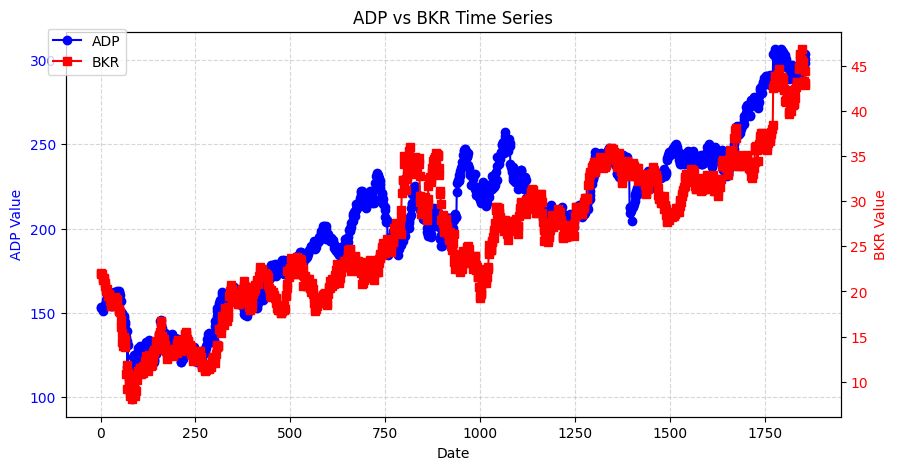

In [26]:
plot_dual_axis(df, "ADP", "BKR")  # Pass any two tickers



In [51]:
coint(df['EQR'].dropna(), df['TSCO'].dropna())

(-2.746267963832079,
 0.1833806548439752,
 array([-3.94078403, -3.36067957, -3.06145832]))

In [52]:
coint(df['TSCO'].dropna(), df['EQR'].dropna())

(-3.3358252097575547,
 0.049995045392548135,
 array([-3.94078403, -3.36067957, -3.06145832]))

In [32]:
def get_cointegration_factor(ticker_1_series, ticker_2_series):
    """
    Calculates the cointegration factor (β) using OLS regression without an intercept.

    Parameters:
        df (pd.DataFrame): DataFrame containing time series data.
        ticker_1 (str): Independent variable.
        ticker_2 (str): Dependent variable.

    Returns:
        float: Cointegration factor (β), or NaN if computation fails.
    """
    try:
        series1 = ticker_1_series.dropna()
        series2 = ticker_2_series.dropna()

        # Ensure both series have the same length
        min_len = min(len(series1), len(series2))
        if min_len < 20:
            return np.nan  # Not enough data points

        series1, series2 = series1.iloc[-min_len:], series2.iloc[-min_len:]

        # OLS Regression: ticker_2 ~ ticker_1 (without intercept)
        model = sm.OLS(series2, series1).fit()
        return model.params[0]  # Extract β coefficient (slope)

    except:
        return np.nan  # Return NaN if an error occurs

In [33]:
cointegrated_df = corr_df[corr_df['p_cointegration']<0.05].sort_values(by='p_cointegration', ascending=False).copy()
factors = []

for index, row in cointegrated_df.iterrows():
    t1, t2 = row["ticker_1"], row["ticker_2"]
    # Get time series data
    series1 = df[t1].dropna()
    series2 = df[t2].dropna()

    # Ensure both series have the same length
    min_len = min(len(series1), len(series2))
    if min_len < 20:
        k_factor = np.nan
    else:
        series1, series2 = series1.iloc[-min_len:], series2.iloc[-min_len:]
        model = sm.OLS(series2, series1).fit()
        k_factor = model.params[0]
    factors.append(k_factor)

# Add factor column to DataFrame
cointegrated_df["cointegration_factor"] = factors


In [34]:
cointegrated_df

,ticker_1,ticker_2,correlation,p1_stationary,p2_stationary,p_cointegration,cointegration_factor
18117,LRCX,KVUE,0.803118,0.468453,0.651679,0.049997,0.229324
166609,CINF,DLR,NaN,0.693350,0.761051,0.049989,1.212510
130993,ADSK,MSCI,NaN,0.739479,0.755105,0.049975,2.125665
219302,J,TDY,NaN,0.405664,0.721666,0.049966,3.430480
68164,MGM,IVZ,0.453975,0.323150,0.411461,0.049966,0.390810
...,...,...,...,...,...,...,...
168594,CMG,CMG,NaN,0.126776,0.126776,0.000000,1.000000
184297,DLTR,DLTR,NaN,0.742231,0.742231,0.000000,1.000000
142120,AOS,AOS,NaN,0.697887,0.697887,0.000000,1.000000
168997,CMI,CMI,NaN,0.756679,0.756679,0.000000,1.000000


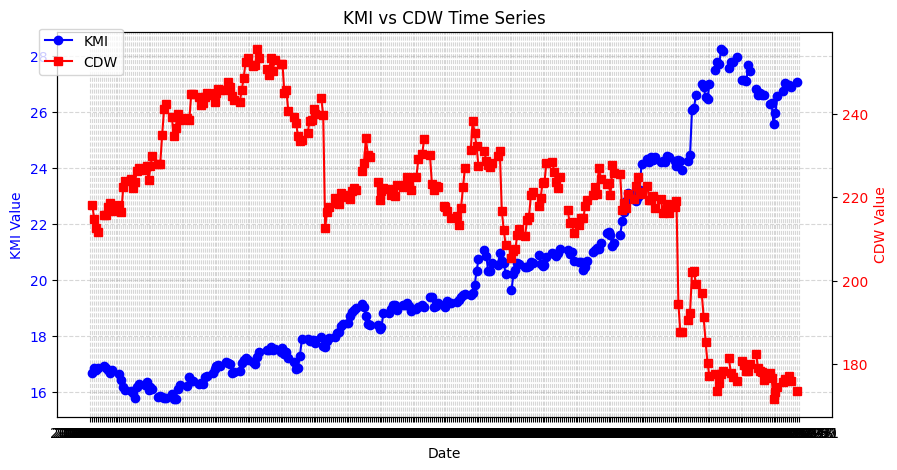

In [36]:
plot_dual_axis(df, "KMI", "CDW")  # Pass any two tickers